In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
columns=['species','a','b','c','d','e','f']
data=pd.read_csv('fish.csv',names=columns)
data.head()

,species,a,b,c,d,e,f
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [3]:
data.shape

(85, 7)

In [4]:
data.isna().sum()

species    0
a          0
b          0
c          0
d          0
e          0
f          0
dtype: int64

In [5]:
data=pd.get_dummies(data)

In [6]:
data.head()

,a,b,c,d,e,f,species_Bream,species_Pike,species_Roach,species_Smelt
0,242.0,23.2,25.4,30.0,38.4,13.4,1,0,0,0
1,290.0,24.0,26.3,31.2,40.0,13.8,1,0,0,0
2,340.0,23.9,26.5,31.1,39.8,15.1,1,0,0,0
3,363.0,26.3,29.0,33.5,38.0,13.3,1,0,0,0
4,430.0,26.5,29.0,34.0,36.6,15.1,1,0,0,0


# kmeans clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss =[]
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\NOHIN JACOB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
wcss

[12236544.02352941,
 4415864.071748767,
 1923737.5826696828,
 907320.0898888889,
 525863.4939910132,
 339894.81715804664,
 225283.71244740637,
 138404.4615079365,
 98158.22034126983,
 78987.11287698415,
 65148.43723015873,
 52626.089944444444]

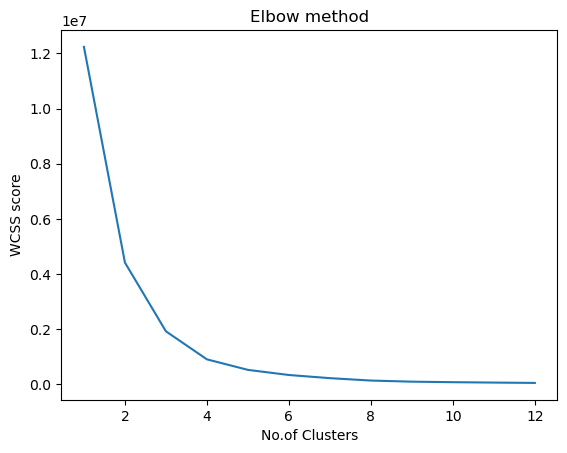

In [10]:
plt.plot(range(1,13),wcss)
plt.title('Elbow method')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS score')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [12]:
print(y_kmeans)

[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 1 1 3 3 3 3]


In [13]:
from sklearn.metrics import silhouette_score
silhoeutte_sc=silhouette_score(data,y_kmeans)
print(silhoeutte_sc)

0.6077749747794599
